In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.palplot(sns.color_palette("Paired",12))

%matplotlib inline

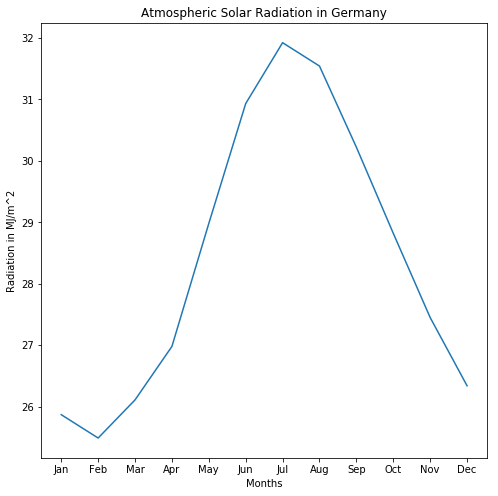

In [3]:
df = pd.read_csv('UNdata_Atmospheric_Solar_Radiation.csv')

months = df.columns[8:32][::2] #slicing data to give months
radiation = df.values[0][8:32][::2] #slicing data to give values associated with month
#df.values has 3 arrays, which only the first holds all the data
plt.figure(figsize=(8,8))
plt.plot(months, radiation)
plt.title('Atmospheric Solar Radiation in Germany')
plt.xlabel('Months')
plt.ylabel('Radiation in MJ/m^2')
plt.show()

Here you can see that the solar radiation in MJ/m^2 is, as expected, highest in July during the summer and lowest in the winter.

In [4]:
df = pd.read_csv('UNdata_Sea_Level_Pressure.csv')
data_mean = df[df['Statistic Description'] == 'Mean Value'] #conditional selection

In [5]:
group_country = data_mean.groupby('Country or Territory').mean() 
months = data_mean.columns[8:32][::2] #selecting the columns for the months
countries = group_country.index #creating an array that contains all the country names

country_data = [] #values for each month organized by country
for i in range(len(countries)):
    months_in_country = [] #values for each month 
    for j in months:
        months_in_country.append(group_country.loc['{}'.format(countries[i]),'{}'.format(j)])
    country_data.append(months_in_country)
    
plots = np.array(country_data)

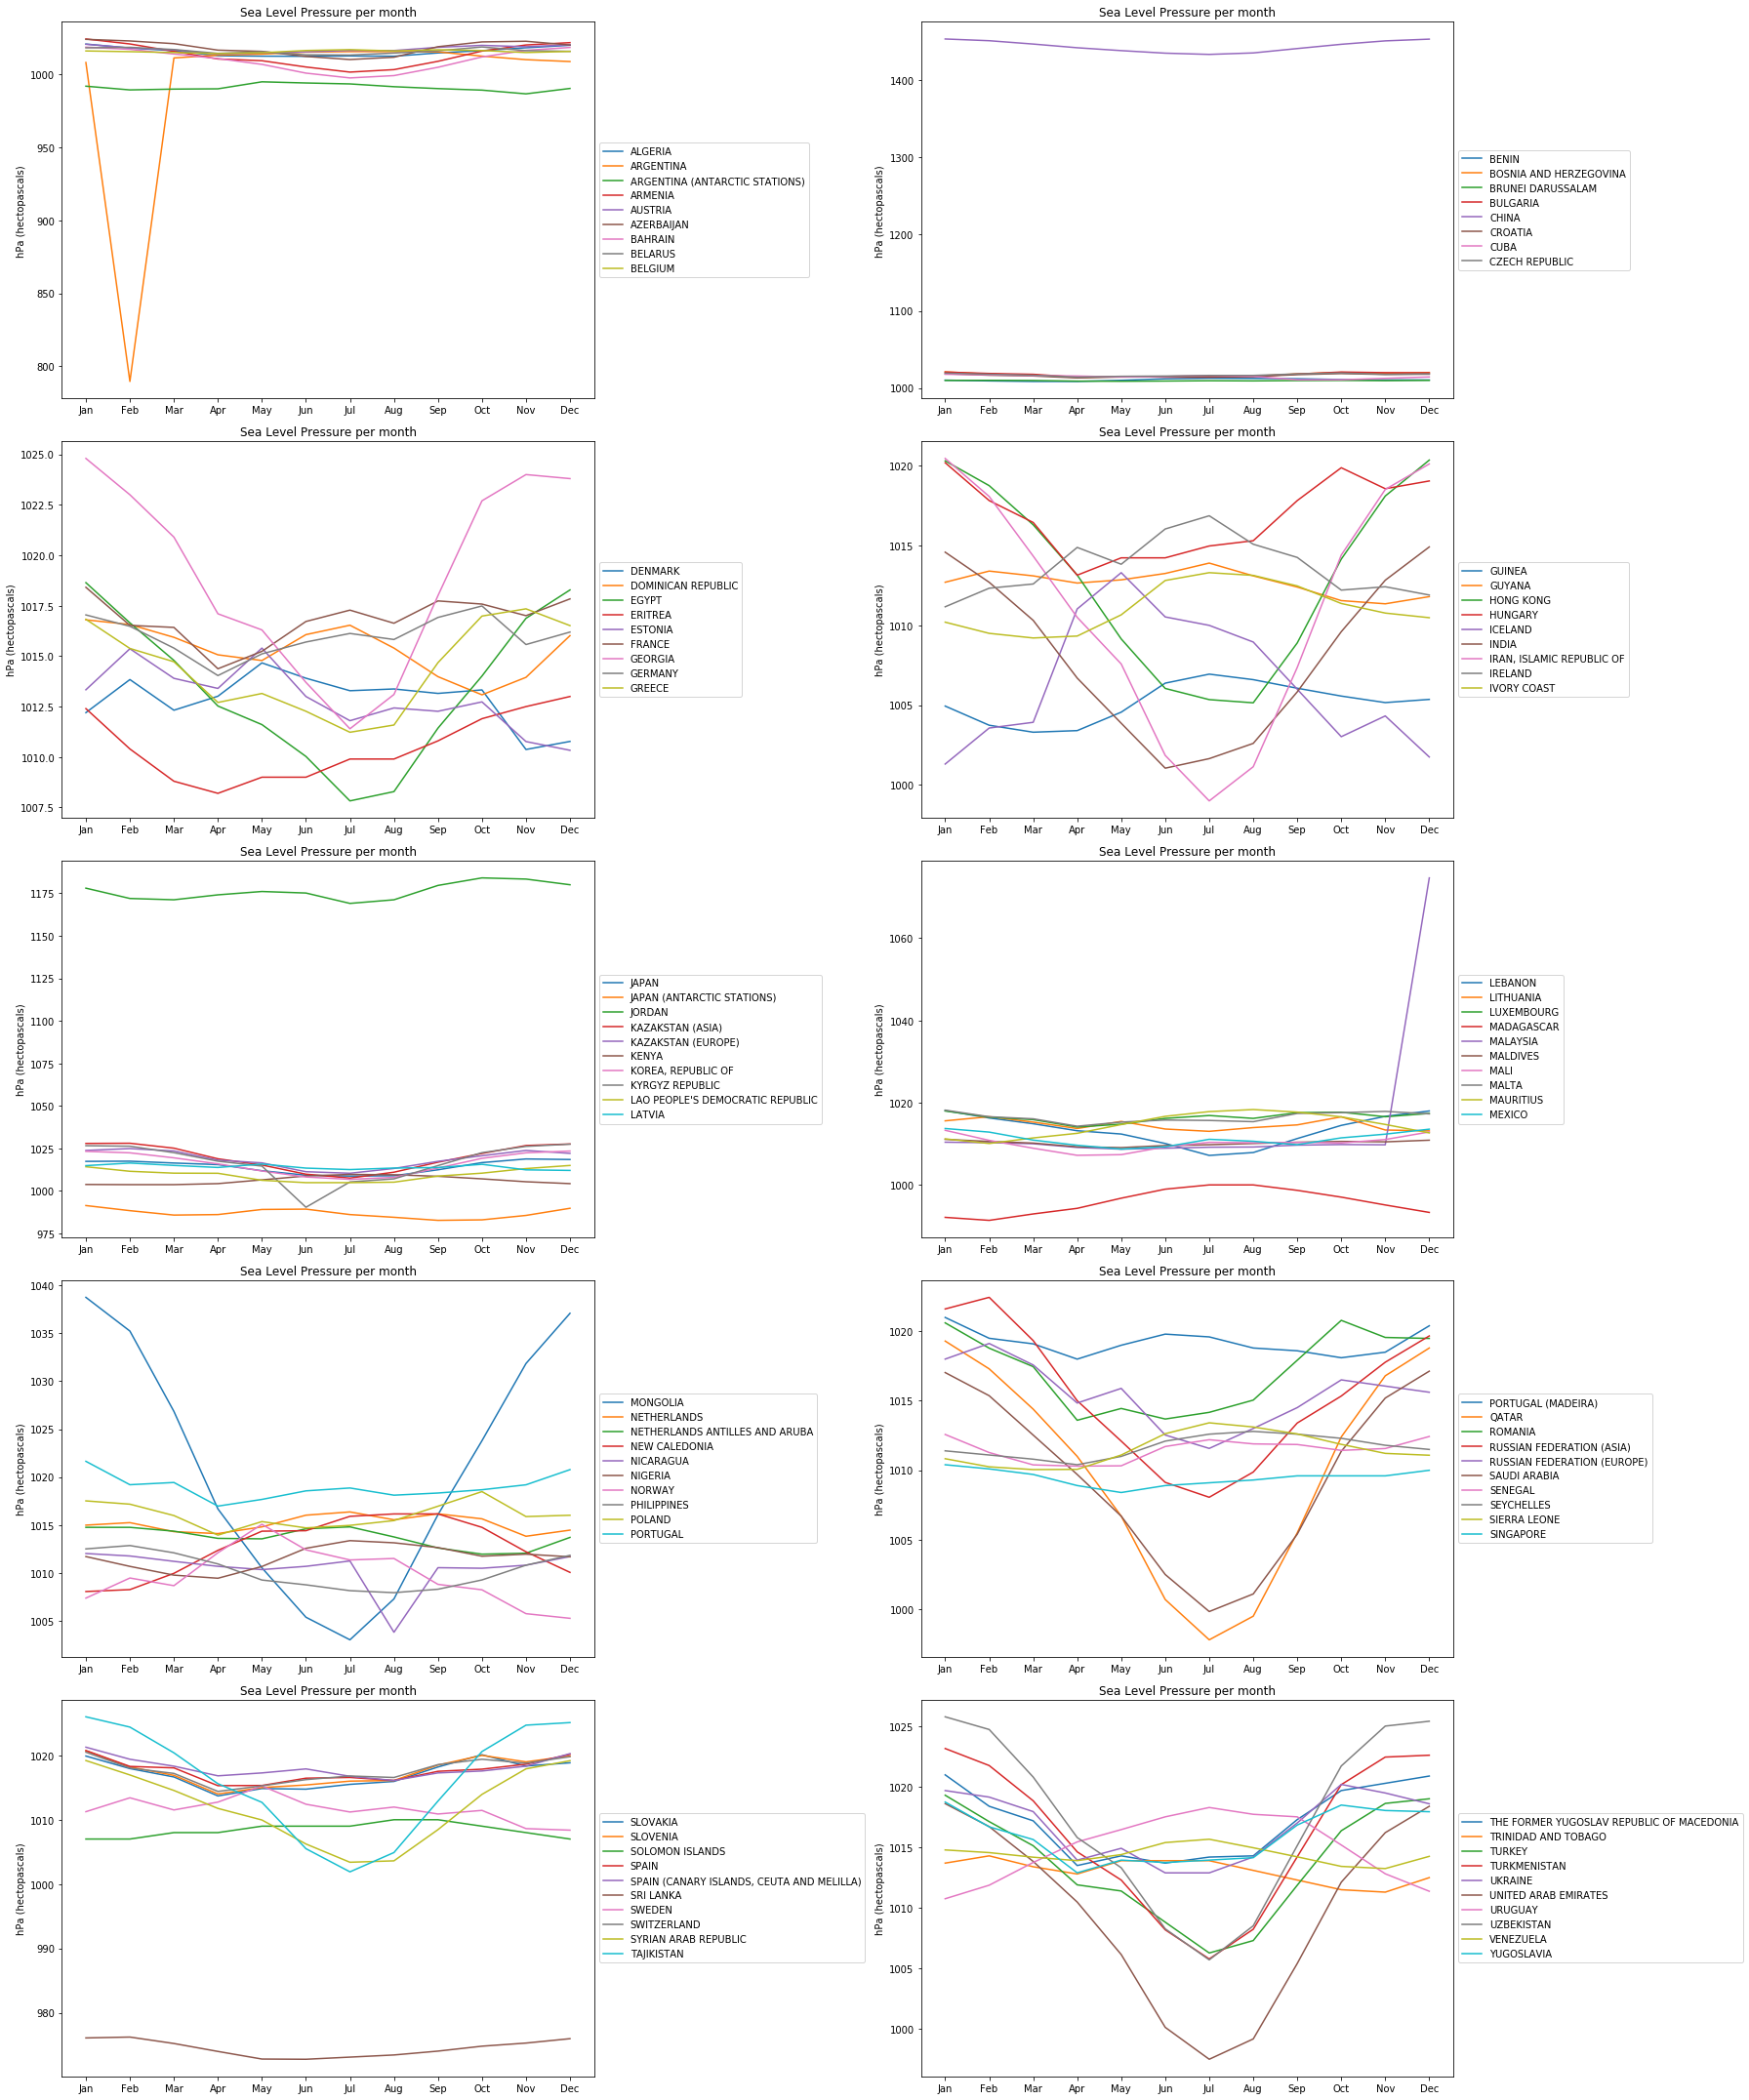

In [9]:
value_add = np.linspace(0,93,10, dtype=int) #will be used to group data in groups of 10. 
#probably a better way to do this

plt.figure(figsize=(25,30))
for k,j in enumerate(value_add): #k is index and j is value
    for i,n in enumerate(plots[j:j+10]): #i is index and n is value
        if (n<=0).any(): #any value in the negatives, we will skip because -999.99 is code for no data
            pass
        else:
            plt.subplot(5,2,k+1)
            plt.plot(months, n, label=countries[i+j])
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title('Sea Level Pressure per month')
            plt.ylabel('hPa (hectopascals)')
            plt.tight_layout()
plt.show()

Would be interesting to group subplots by country locations. Or similarities between countries. Here we cab see the differences between the sea level pressure throughout the year in relation to other countries. To understand why some countries have differences would most likely require information about the country.

In [7]:
months = data_mean.columns[8:32][::2]

group = data_mean.groupby('Country or Territory').mean()
#grouping all values by country

subplots = [] #will be used for subplots - contains pressure values for each month per country

for month in months:
    subplots.append(group['{}'.format(month)])

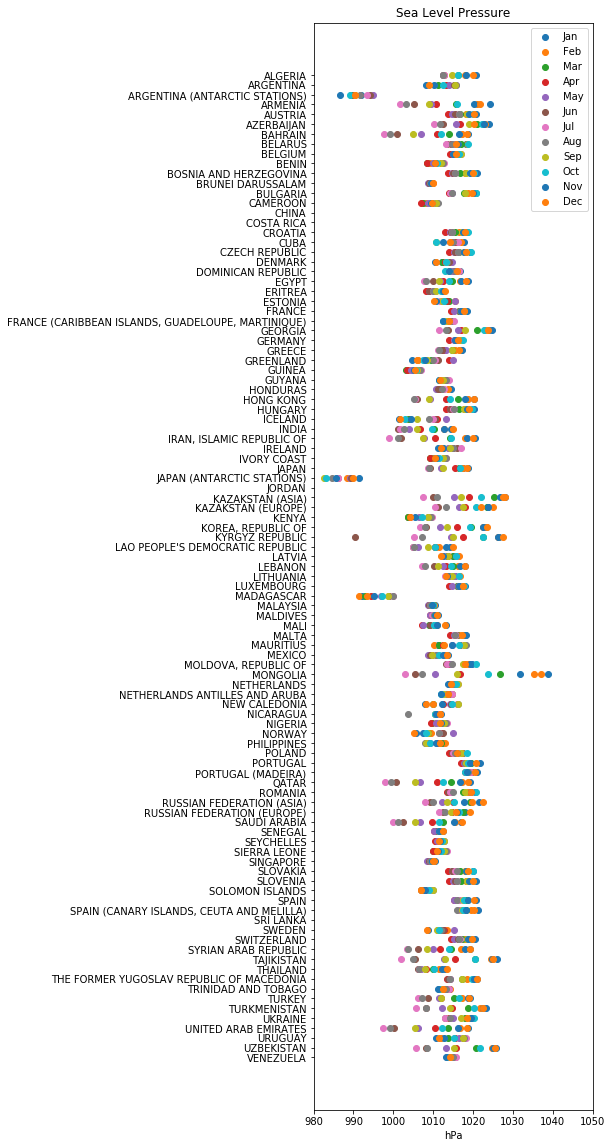

In [8]:
plt.figure(figsize=(5, 20))

for i,j in enumerate(months):
    plt.scatter(subplots[i][1:-1][::-1].values, subplots[i][1:-1][::-1].index, label = j)
    plt.xlabel('hPa')
    plt.xlim(980,1050)
    plt.title('Sea Level Pressure')
    plt.legend()
    
plt.show()

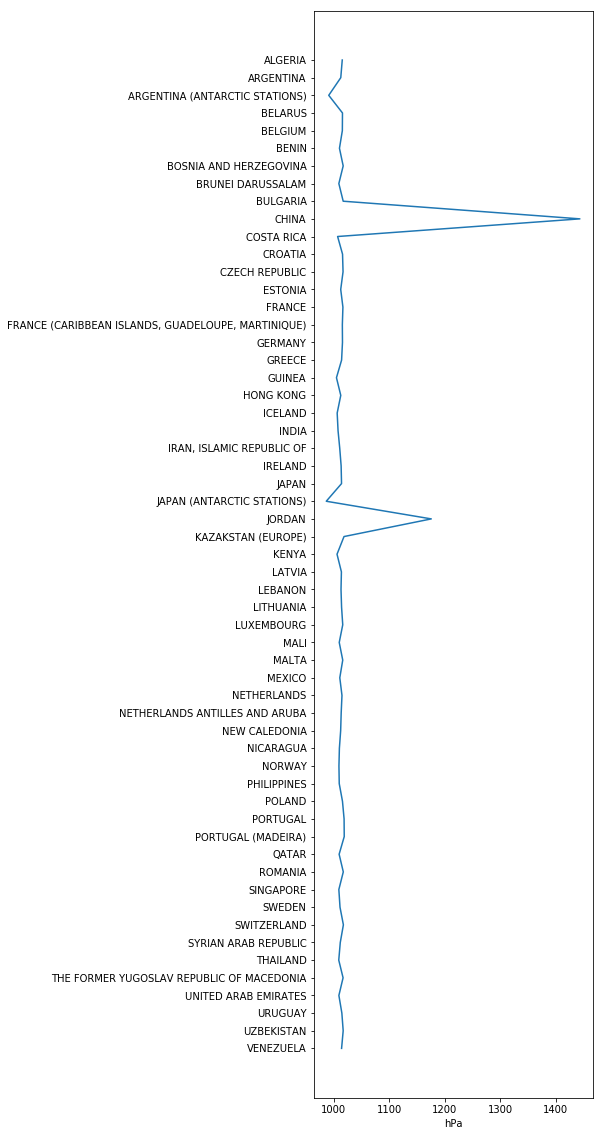

In [26]:
#average sea level pressure per country
data_good = data_mean[data_mean['Annual'] >= 0] #Only take values greater than 0
annual_per_country = data_good.groupby('Country or Territory')['Annual'].mean() #Grouping by Country for annual data
plt.figure(figsize=(5,20))
plt.plot(annual_per_country.values[1:-1][::-1], annual_per_country.index[1:-1][::-1])
plt.xlabel('hPa')
plt.show()
